In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train), len(X_test)

(60000, 10000)

In [4]:
X_train[0].shape

(28, 28)

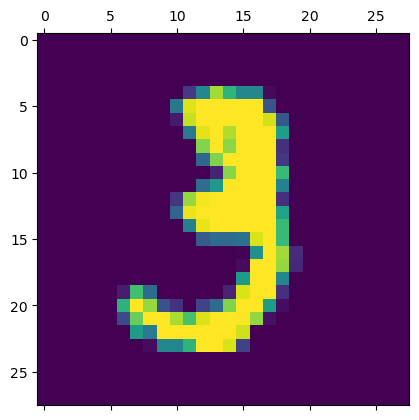

In [5]:
plt.matshow(X_train[10])

In [6]:
y_train[10]

3

In [7]:
X_train.shape

(60000, 28, 28)

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.6028 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4194 - accuracy: 0.8968
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3098 - accuracy: 0.9208
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2639 - accuracy: 0.9313
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2411 - accuracy: 0.9372
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2280 - accuracy: 0.9408
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2208 - accuracy: 0.9432
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2020 - accuracy: 0.9476
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2001 - accuracy: 0.9493
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.193

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3394 - accuracy: 0.9307


[0.3394401967525482, 0.9307000041007996]

In [12]:
y_predicted = model.predict(X_train)
y_predicted.shape

1875/1875 [==============================] - 3s 2ms/step


(60000, 10)

In [13]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[5, 0, 1, 1, 9]

In [21]:
cm = tf.math.confusion_matrix(labels=y_train, predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

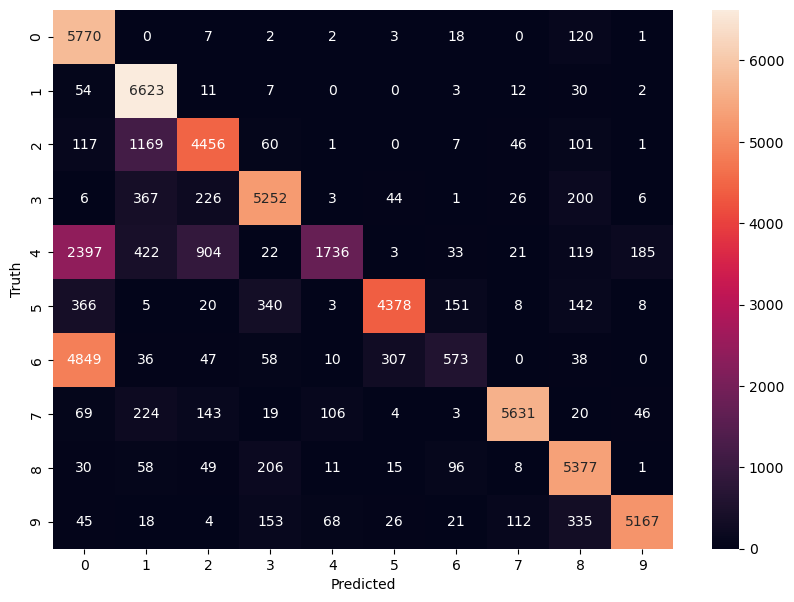

In [22]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')